In [3]:
import numpy as np
import pandas as pd
import glob
from joblib import Parallel, delayed
from tqdm import tqdm
import pickle
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
application = pd.read_csv('/Users/fuwenkai/Documents/U of T/MMF/MMF Machine Learning/Project/home-credit-default-risk/application_train.csv')
# application_test = pd.read_csv('./src/application_test.csv')
# application_test doesnt contain target column, it is useless to us because even if we develop a model, we still dont know its accuracy on the training set. 

In [3]:
bureau = pd.read_csv('/Users/fuwenkai/Documents/U of T/MMF/MMF Machine Learning/Project/home-credit-default-risk/bureau.csv')

In [4]:
bureau_balance = pd.read_csv('/Users/fuwenkai/Documents/U of T/MMF/MMF Machine Learning/Project/home-credit-default-risk/bureau_balance.csv')

In [5]:
credit_card_balance = pd.read_csv('/Users/fuwenkai/Documents/U of T/MMF/MMF Machine Learning/Project/home-credit-default-risk/credit_card_balance.csv')

In [6]:
installments_payments = pd.read_csv('/Users/fuwenkai/Documents/U of T/MMF/MMF Machine Learning/Project/home-credit-default-risk/installments_payments.csv')

In [7]:
POS_CASH_balance = pd.read_csv('/Users/fuwenkai/Documents/U of T/MMF/MMF Machine Learning/Project/home-credit-default-risk/POS_CASH_balance.csv')
previous_application = pd.read_csv('/Users/fuwenkai/Documents/U of T/MMF/MMF Machine Learning/Project/home-credit-default-risk/previous_application.csv')

In [8]:
home_credit_columns_description = pd.read_csv('/Users/fuwenkai/Documents/U of T/MMF/MMF Machine Learning/Project/home-credit-default-risk/HomeCredit_columns_description.csv', encoding='iso-8859-1',
                                              index_col=0)

In [112]:
# sample_submission = pd.read_csv('./src/sample_submission.csv')

# Data preprocessing

In [9]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
# application.loc[:,['SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV']]

In [11]:
home_credit_columns_description

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...
217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [ ]:
bureau

the SK_ID_CURR is the unique id for each client

In [116]:
len(application)

307511

In [117]:
len(bureau)

1716428

In [118]:
len(bureau_balance)

27299925

In [119]:
len(credit_card_balance)

3840312

In [120]:
len(installments_payments)

13605401

In [121]:
len(POS_CASH_balance)

10001358

In [122]:
len(previous_application)

1670214

## merge the bureau data with bureau_balance data

In [123]:
status_count = bureau_balance.groupby('SK_ID_BUREAU')['STATUS'].value_counts().unstack().fillna(0)
status_count.columns = ['BUREAU_BALANCE_' + str(col_name) for col_name in status_count.columns]
status_count.reset_index(inplace=True)
month_count = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].min().abs().rename('BUREAU_BALANCE_MONTH_COUNT')
status_count = status_count.merge(month_count, how='left', on='SK_ID_BUREAU')  # add 0.001 to avoid divide by 0

In [124]:
# scale the status_count by month_count
for col in status_count.columns[1:-1]:
    status_count[col] = status_count[col] / (status_count['BUREAU_BALANCE_MONTH_COUNT'] + 1.001)

In [125]:
status_count.columns

Index(['SK_ID_BUREAU', 'BUREAU_BALANCE_0', 'BUREAU_BALANCE_1',
       'BUREAU_BALANCE_2', 'BUREAU_BALANCE_3', 'BUREAU_BALANCE_4',
       'BUREAU_BALANCE_5', 'BUREAU_BALANCE_C', 'BUREAU_BALANCE_X',
       'BUREAU_BALANCE_MONTH_COUNT'],
      dtype='object')

In [126]:
bureau = bureau.merge(status_count, how='left', on='SK_ID_BUREAU')

In [127]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,AMT_ANNUITY,BUREAU_BALANCE_0,BUREAU_BALANCE_1,BUREAU_BALANCE_2,BUREAU_BALANCE_3,BUREAU_BALANCE_4,BUREAU_BALANCE_5,BUREAU_BALANCE_C,BUREAU_BALANCE_X,BUREAU_BALANCE_MONTH_COUNT
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,...,4.896370e+05,774354.000000,774354.000000,774354.000000,774354.000000,774354.000000,774354.000000,774354.000000,774354.000000,774354.000000
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,...,1.571276e+04,4.726299,0.014638,0.000723,0.000248,0.000161,0.001339,0.689338,2.205009,36.288669
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,...,3.258269e+05,65.733833,1.968870,0.008864,0.004092,0.003129,0.025614,18.667082,44.658598,25.449736
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,...,0.000000e+00,0.081631,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,...,0.000000e+00,0.249984,0.000000,0.000000,0.000000,0.000000,0.000000,0.166657,0.020000,31.000000
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,...,1.350000e+04,0.624961,0.000000,0.000000,0.000000,0.000000,0.000000,0.718728,0.249938,53.000000
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,...,1.184534e+08,1000.000000,1000.000000,0.833194,0.499875,0.666445,1.998002,1000.000000,1000.000000,96.000000


## Cleaning bureau data

In [14]:
# print number of unique item in each column
for col in bureau.columns:
    print(col, 'Unique item:',  len(bureau[col].unique()),'NA:',  len(bureau.loc[bureau[col].isnull()]),'value=0:', len(bureau.loc[bureau[col] == 0]))

SK_ID_CURR Unique item: 305811 NA: 0 value=0: 0
SK_ID_BUREAU Unique item: 1716428 NA: 0 value=0: 0
CREDIT_ACTIVE Unique item: 4 NA: 0 value=0: 0
CREDIT_CURRENCY Unique item: 4 NA: 0 value=0: 0
DAYS_CREDIT Unique item: 2923 NA: 0 value=0: 25
CREDIT_DAY_OVERDUE Unique item: 942 NA: 0 value=0: 1712211
DAYS_CREDIT_ENDDATE Unique item: 14097 NA: 105553 value=0: 883
DAYS_ENDDATE_FACT Unique item: 2918 NA: 633653 value=0: 64
AMT_CREDIT_MAX_OVERDUE Unique item: 68252 NA: 1124488 value=0: 470650
CNT_CREDIT_PROLONG Unique item: 10 NA: 0 value=0: 1707314
AMT_CREDIT_SUM Unique item: 236709 NA: 13 value=0: 66582
AMT_CREDIT_SUM_DEBT Unique item: 226538 NA: 257669 value=0: 1016434
AMT_CREDIT_SUM_LIMIT Unique item: 51727 NA: 591780 value=0: 1050142
AMT_CREDIT_SUM_OVERDUE Unique item: 1616 NA: 0 value=0: 1712270
CREDIT_TYPE Unique item: 15 NA: 0 value=0: 0
DAYS_CREDIT_UPDATE Unique item: 2982 NA: 0 value=0: 605
AMT_ANNUITY Unique item: 40322 NA: 1226791 value=0: 256915


In [131]:
# def aggregate_do_nothing(bureau, col):
#     res = bureau[col]
#     return res.reindex(application['SK_ID_CURR']).fillna(0).rename('BUREAU_' + col)

In [18]:
def aggregate_count(bureau, col):
    # res = bureau[bureau['SK_ID_CURR'].isin(application['SK_ID_CURR'])]
    # res = res.groupby('SK_ID_CURR')[col].count()
    res = bureau.groupby('SK_ID_CURR')[col].count()
    return res.reindex(application['SK_ID_CURR']).fillna(0).rename('BUREAU_' + col + '_COUNT')

In [19]:
def aggregate_categorical(bureau, col):
    # res = bureau[bureau['SK_ID_CURR'].isin(application['SK_ID_CURR'])]
    # res = res.groupby('SK_ID_CURR')[col].value_counts().unstack()
    res = bureau.groupby('SK_ID_CURR')[col].value_counts().unstack()
    res = res.reindex(application['SK_ID_CURR']).fillna(0)
    res.columns = ['BUREAU_' + col + '_' + str(col_name) for col_name in res.columns]
    return res

In [20]:
def aggregate_avg_max_min_std_skw(bureau, col):
    # res = bureau[bureau['SK_ID_CURR'].isin(application['SK_ID_CURR'])]
    # res = res.groupby('SK_ID_CURR')[col].agg(['mean', 'max', 'min', 'std', 'skew'])
    res = bureau.groupby('SK_ID_CURR')[col].agg(['mean', 'max', 'min', 'std', 'skew'])
    res = res.reindex(application['SK_ID_CURR']).fillna(0)
    res.columns = ['BUREAU_' + col + '_' + col_name for col_name in res.columns]
    return res

In [21]:
def aggregate_avg_max_min_std_skw_nan_count(bureau, col):
    res = bureau[bureau['SK_ID_CURR'].isin(application['SK_ID_CURR'])]
    res = res.groupby('SK_ID_CURR')[col].agg(['mean', 'max', 'min', 'std', 'skew'])
    # count the number of nan
    res['nan_count'] = bureau.groupby('SK_ID_CURR')[col].apply(lambda x: x.isnull().sum())
    res = res.reindex(application['SK_ID_CURR']).fillna(0)
    res.columns = ['BUREAU_' + col + '_' + col_name for col_name in res.columns]
    return res

In [136]:
bureau_agg_dic = {'SK_ID_BUREAU': 'aggregate_count',
                  'CREDIT_ACTIVE': 'aggregate_categorical',
                  'CREDIT_CURRENCY': 'aggregate_categorical',
                  'DAYS_CREDIT': 'aggregate_avg_max_min_std_skw',
                  'CREDIT_DAY_OVERDUE': 'aggregate_avg_max_min_std_skw',
                  'DAYS_CREDIT_ENDDATE': 'aggregate_avg_max_min_std_skw_nan_count',
                  'DAYS_ENDDATE_FACT': 'aggregate_avg_max_min_std_skw_nan_count',
                  'AMT_CREDIT_MAX_OVERDUE': 'aggregate_avg_max_min_std_skw_nan_count',
                  'CNT_CREDIT_PROLONG': 'aggregate_avg_max_min_std_skw',
                  'AMT_CREDIT_SUM': 'aggregate_avg_max_min_std_skw',
                  'AMT_CREDIT_SUM_DEBT': 'aggregate_avg_max_min_std_skw_nan_count',
                  'AMT_CREDIT_SUM_LIMIT': 'aggregate_avg_max_min_std_skw_nan_count',
                  'AMT_CREDIT_SUM_OVERDUE': 'aggregate_avg_max_min_std_skw',
                  'DAYS_CREDIT_UPDATE': 'aggregate_avg_max_min_std_skw',
                  'AMT_ANNUITY': 'aggregate_avg_max_min_std_skw_nan_count',
                  'BUREAU_BALANCE_0': 'aggregate_avg_max_min_std_skw',
                  'BUREAU_BALANCE_1': 'aggregate_avg_max_min_std_skw',
                  'BUREAU_BALANCE_2': 'aggregate_avg_max_min_std_skw',
                  'BUREAU_BALANCE_3': 'aggregate_avg_max_min_std_skw',
                  'BUREAU_BALANCE_4': 'aggregate_avg_max_min_std_skw',
                  'BUREAU_BALANCE_5': 'aggregate_avg_max_min_std_skw',
                  'BUREAU_BALANCE_C': 'aggregate_avg_max_min_std_skw',
                  'BUREAU_BALANCE_X': 'aggregate_avg_max_min_std_skw',
                  'BUREAU_BALANCE_MONTH_COUNT': 'aggregate_avg_max_min_std_skw'}

In [37]:
home_credit_columns_description.where(home_credit_columns_description['Row'] == 'NAME_CONTRACT_STATUS').dropna(axis=0, how='all')['Description'].values[2]




'Contract status (approved, cancelled, ...) of previous application'

In [138]:
# parallel processing
bureau_merging_result = Parallel(n_jobs=-1)(
    delayed(eval(bureau_agg_dic[col]))(bureau[bureau['SK_ID_CURR'].isin(application['SK_ID_CURR'])], col) for col in bureau_agg_dic.keys())# 6min

In [139]:
# merge all the result on SK_ID_CURR
bureau_merging_result = pd.concat(bureau_merging_result, axis=1)

## Cleaning POS Cash data
grace

In [78]:
POS_CASH_balance['NAME_CONTRACT_STATUS'].value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

In [104]:
def contract_status(POS_CASH_balance):
    # one hot encode the NAME_CONTRACT_STATUS
    dum = pd.get_dummies(POS_CASH_balance['NAME_CONTRACT_STATUS'])
    for col in dum:
        dum[col] = dum[col] * (1 - POS_CASH_balance['CNT_INSTALMENT_FUTURE'] / POS_CASH_balance['CNT_INSTALMENT'])
    dum.columns = ['POS_CASH_' + str(col_name) for col_name in dum.columns]
    return POS_CASH_balance.loc[:, ['SK_ID_PREV', 'SK_ID_CURR', ]].join(dum).groupby(['SK_ID_CURR', 'SK_ID_PREV']).max().groupby(
        'SK_ID_CURR').mean().reindex(application['SK_ID_CURR']).fillna(0)

In [106]:
def earliest_starting(POS_CASH_balance):
    return POS_CASH_balance.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['MONTHS_BALANCE'].min().abs().groupby(
        'SK_ID_CURR').mean().reindex(application['SK_ID_CURR']).fillna(0)

In [105]:
contract_status(POS_CASH_balance)

,POS_CASH_Active,POS_CASH_Amortized debt,POS_CASH_Approved,POS_CASH_Canceled,POS_CASH_Completed,POS_CASH_Demand,POS_CASH_Returned to the store,POS_CASH_Signed,POS_CASH_XNA
SK_ID_CURR,,,,,,,,,
100002,0.750000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
100003,0.805556,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0
100004,0.500000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
100006,0.916667,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0
100007,0.826569,0.0,0.0,0.0,0.600000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
456251,0.750000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
456252,0.833333,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
456253,1.000000,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0


In [107]:
earliest_starting(POS_CASH_balance)

SK_ID_CURR
100002    19.000000
100003    43.333333
100004    27.000000
100006    12.000000
100007    42.200000
            ...    
456251     9.000000
456252    82.000000
456253    84.333333
456254    10.000000
456255    22.333333
Name: MONTHS_BALANCE, Length: 307511, dtype: float64

## Cleaning Credit card data
evelyn

In [145]:
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


## Cleaning Installment data
fu

In [10]:
installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [50]:
installments_payments.groupby(['SK_ID_CURR', 'SK_ID_PREV']).count()

NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
SK_ID_CURR SK_ID_PREV                                                  
100001     1369693                          4                      4   
           1851984                          3                      3   
100002     1038818                         19                     19   
100003     1810518                          7                      7   
           2396755                         12                     12   
...                                       ...                    ...   
456255     1359084                          9                      9   
           1743609                         10                     10   
           2073384                          5                      5   
           2631384                         29                     29   
           2729207                          3                      3   

                       DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  \
SK_ID_CURR SK_ID_PREV                                                        
100001     1369693                   4                   4               4   
           1851984                   3                   3               3   
100002     1038818                  19                  19              19   
100003     1810518                   7                   7               7   
           2396755                  12                  12              12   
...                                ...                 ...             ...   
456255     1359084                   9                   9               9   
           1743609                  10                  10              10   
           2073384                   5                   5               5   
           2631384                  29                  29              29   
           2729207                   3                   3               3   

                       AMT_PAYMENT  
SK_ID_CURR SK_ID_PREV               
100001     1369693               4  
           1851984               3  
100002     1038818              19  
100003     1810518               7  
           2396755              12  
...                            ...  
456255     1359084               9  
           1743609              10  
           2073384               5  
           2631384              29  
           2729207               3  

[997752 rows x 6 columns]

In [70]:
def INS_aggregate_categorical(ins, col):
    res = ins.groupby('SK_ID_CURR')[col].value_counts().unstack()
    res = res.reindex(application['SK_ID_CURR']).fillna(0)
    res.columns = ['INS_' + col + '_' + str(col_name) for col_name in res.columns]
    return res

In [73]:
def INS_aggregate_avg(ins, col):
    res = ins.groupby(['SK_ID_CURR']).mean()[[col]]
    res = res.reindex(ins['SK_ID_CURR']).fillna(0)
    res.columns = ['INS_' + col + '_' + 'mean']
    return res

In [76]:
def INS_aggregate_avg_max_min_std_skw(ins, col):
    res = ins.groupby(['SK_ID_CURR', 'SK_ID_PREV'])[col].agg(['mean', 'max', 'min', 'std', 'skew']).groupby(['SK_ID_CURR']).mean()
    res = res.reindex(ins['SK_ID_CURR']).fillna(0)
    res.columns = ['INS_' + col + '_' + col_name for col_name in res.columns]
    return res

In [77]:
INS_function_list = [INS_aggregate_avg, 
                 INS_aggregate_avg_max_min_std_skw, 
                 INS_aggregate_avg_max_min_std_skw, 
                 INS_aggregate_avg_max_min_std_skw, 
                 INS_aggregate_avg_max_min_std_skw, 
                 INS_aggregate_avg_max_min_std_skw]
INS_col_list = installments_payments.columns[2:]
INS_merging_df = pd.concat([func(installments_payments, col) for func, col in zip(INS_function_list, INS_col_list)], axis = 1)

In [66]:
# The one for applicant merging
INS_merging_df

,INS_NUM_INSTALMENT_NUMBER_mean,INS_NUM_INSTALMENT_NUMBER_max,INS_NUM_INSTALMENT_NUMBER_min,INS_NUM_INSTALMENT_NUMBER_std,INS_NUM_INSTALMENT_NUMBER_skew,INS_DAYS_INSTALMENT_mean,INS_DAYS_INSTALMENT_max,INS_DAYS_INSTALMENT_min,INS_DAYS_INSTALMENT_std,INS_DAYS_INSTALMENT_skew,...,INS_AMT_INSTALMENT_mean,INS_AMT_INSTALMENT_max,INS_AMT_INSTALMENT_min,INS_AMT_INSTALMENT_std,INS_AMT_INSTALMENT_skew,INS_AMT_PAYMENT_mean,INS_AMT_PAYMENT_max,INS_AMT_PAYMENT_min,INS_AMT_PAYMENT_std,INS_AMT_PAYMENT_skew
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,10.000000,19.0,1.0,5.627314,0.000000,-295.000000,-25.0,-565.0,168.819430,0.000000,...,11559.247105,53093.745,9251.775,10058.037722,4.358899,11559.247105,53093.745,9251.775,10058.037722,4.358899
100003,5.080000,12.0,1.0,3.134751,0.643067,-1378.160000,-536.0,-2310.0,757.453556,-0.098554,...,64754.586000,560835.360,6662.970,110542.592300,4.022295,64754.586000,560835.360,6662.970,110542.592300,4.022295
100004,2.000000,3.0,1.0,1.000000,0.000000,-754.000000,-724.0,-784.0,30.000000,0.000000,...,7096.155000,10573.965,5357.250,3011.871810,1.732051,7096.155000,10573.965,5357.250,3011.871810,1.732051
100006,4.437500,10.0,1.0,2.897556,0.552361,-252.250000,-11.0,-545.0,178.373204,-0.438026,...,62947.088438,691786.890,2482.920,168097.624347,3.966549,62947.088438,691786.890,2482.920,168097.624347,3.966549
100007,7.045455,17.0,1.0,4.092890,0.305102,-1028.606061,-14.0,-2326.0,682.127529,-0.429884,...,12666.444545,22678.785,1821.780,7852.910669,-0.286893,12214.060227,22678.785,0.180,8048.060877,-0.262860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,4.000000,7.0,1.0,2.160247,0.000000,-120.000000,-30.0,-210.0,64.807407,0.000000,...,7492.924286,12815.010,6605.910,2346.819209,2.645751,7492.924286,12815.010,6605.910,2346.819209,2.645751
456252,3.500000,6.0,1.0,1.870829,0.000000,-2391.000000,-2316.0,-2466.0,56.124861,0.000000,...,10069.867500,10074.465,10046.880,11.261529,-2.449490,10069.867500,10074.465,10046.880,11.261529,-2.449490
456253,4.785714,12.0,1.0,3.662252,1.076563,-2372.928571,-1716.0,-2915.0,526.630138,0.307054,...,4399.707857,5575.185,2754.450,1145.446623,-0.222279,4115.915357,5575.185,27.270,1638.228743,-1.168160


### Potential Feature Engineering
1
overpayment_period_ratio = ('DAYS_ENTRY_PAYMENT' - 'DAYS_INSTALMENT')/('DAYS_INSTALMENT'+0.0001)

2
overpayment_amount_ratio = ('AMT_PAYMENT' - 'AMT_INSTALMENT')/('AMT_INSTALMENT'+0.0001)

# Feature Engineering for Installment Variables

In [4]:
cleaned_data = pd.read_csv('/Users/fuwenkai/Documents/U of T/MMF/MMF Machine Learning/Project/cleaned_data.csv', index_col=0)

In [5]:
def mutual_info(data,sort = False,pairwise_corr = True,figsize=(11, 9),clustermap = False):
    X_list= data.columns
    if len(X_list) == 1:
        res = mutual_info_classif(data[X_list[0]].values.reshape(-1, 1), cleaned_data['TARGET'], random_state=42)
    else:
        res = mutual_info_classif(data.loc[:, X_list], cleaned_data['TARGET'], random_state=42)
    
    if clustermap:
        #plot clustermap
        corr = data.corr(method='kendall')
        # mask = np.triu(np.ones_like(corr, dtype=bool))
        # f, ax = plt.subplots(figsize=figsize)
        # cmap = sns.diverging_palette(230, 20, as_cmap=True)
        # using same color for large correlation both positive and negative
        # cmap = sns.diverging_palette(230, 20, as_cmap=True)
        # include number in the heatmap
        # sns.clustermap(corr, cmap='RdYlGn',mask=mask, vmax=1, vmin=-1, center=0,
        #              linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')
        sns.clustermap(corr, cmap='RdYlGn', vmax=1, vmin=-1, center=0,
                     linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f',row_cluster=False)
        plt.title('Pairwise Correlation Clustermap')
        plt.show()
        pairwise_corr = False
    
    if pairwise_corr:
        #plot heatmap
        corr = data.corr(method='kendall')
        mask = np.triu(np.ones_like(corr, dtype=bool))
        f, ax = plt.subplots(figsize=figsize)
        # cmap = sns.diverging_palette(230, 20, as_cmap=True)
        # using same color for large correlation both positive and negative
        # cmap = sns.diverging_palette(230, 20, as_cmap=True)
        # include number in the heatmap
        sns.heatmap(corr, cmap='RdYlGn',mask=mask, vmax=1, vmin=-1, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')
        plt.title('Pairwise Correlation Heatmap')
        plt.show()
    
    if sort:
        return pd.DataFrame(res, index=X_list, columns=['mutual_info_with_target']).sort_values('mutual_info_with_target',
                                                                                            ascending=False)
    else:
        return pd.DataFrame(res, index=X_list, columns=['mutual_info_with_target'])

## Overpayment period ratio

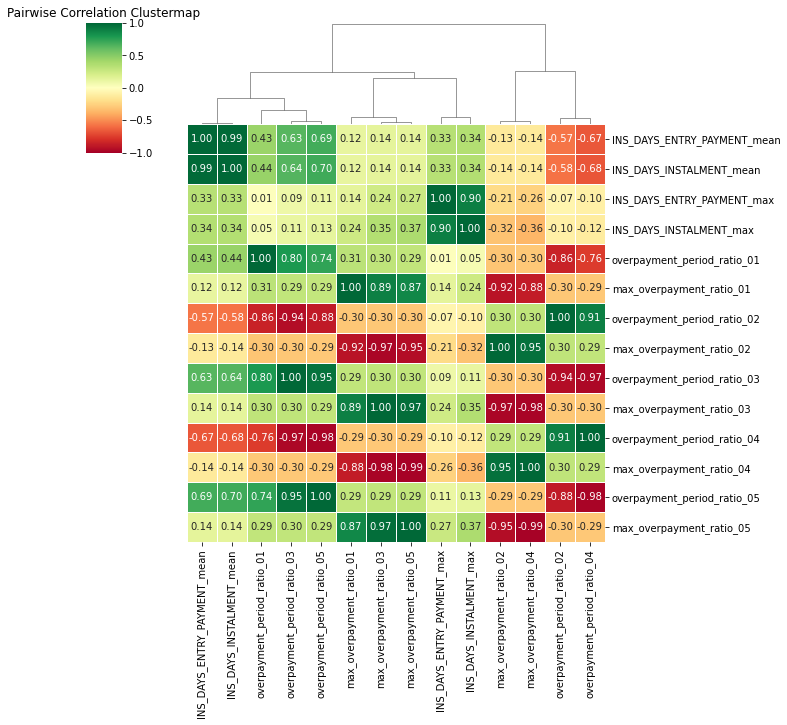

,mutual_info_with_target
INS_DAYS_ENTRY_PAYMENT_mean,0.002241
INS_DAYS_INSTALMENT_mean,0.001914
INS_DAYS_ENTRY_PAYMENT_max,0.000663
INS_DAYS_INSTALMENT_max,0.000259
overpayment_period_ratio_01,0.000336
max_overpayment_ratio_01,0.001916
overpayment_period_ratio_02,0.001800
max_overpayment_ratio_02,0.001981
overpayment_period_ratio_03,0.001020
max_overpayment_ratio_03,0.001418


In [38]:
tmp = cleaned_data.loc[:, ['INS_DAYS_ENTRY_PAYMENT_mean', 'INS_DAYS_INSTALMENT_mean', 
                           'INS_DAYS_ENTRY_PAYMENT_max', 'INS_DAYS_INSTALMENT_max']]

tmp['overpayment_period_ratio_01'] = (tmp['INS_DAYS_ENTRY_PAYMENT_mean'] - tmp['INS_DAYS_INSTALMENT_mean']) / (tmp['INS_DAYS_INSTALMENT_mean'] + 0.01)
tmp['max_overpayment_ratio_01'] = (tmp['INS_DAYS_ENTRY_PAYMENT_max'] - tmp['INS_DAYS_INSTALMENT_max']) / (tmp['INS_DAYS_INSTALMENT_max'] + 0.01)
tmp['overpayment_period_ratio_02'] = (tmp['INS_DAYS_ENTRY_PAYMENT_mean'] - tmp['INS_DAYS_INSTALMENT_mean']) / (tmp['INS_DAYS_INSTALMENT_mean'] + 0.01) ** 2
tmp['max_overpayment_ratio_02'] = (tmp['INS_DAYS_ENTRY_PAYMENT_max'] - tmp['INS_DAYS_INSTALMENT_max']) / (tmp['INS_DAYS_INSTALMENT_max'] + 0.01) ** 2
tmp['overpayment_period_ratio_03'] = (tmp['INS_DAYS_ENTRY_PAYMENT_mean'] - tmp['INS_DAYS_INSTALMENT_mean']) / (tmp['INS_DAYS_INSTALMENT_mean'] + 0.01) ** 3
tmp['max_overpayment_ratio_03'] = (tmp['INS_DAYS_ENTRY_PAYMENT_max'] - tmp['INS_DAYS_INSTALMENT_max']) / (tmp['INS_DAYS_INSTALMENT_max'] + 0.01) ** 3
tmp['overpayment_period_ratio_04'] = (tmp['INS_DAYS_ENTRY_PAYMENT_mean'] - tmp['INS_DAYS_INSTALMENT_mean']) / (tmp['INS_DAYS_INSTALMENT_mean'] + 0.01) ** 4
tmp['max_overpayment_ratio_04'] = (tmp['INS_DAYS_ENTRY_PAYMENT_max'] - tmp['INS_DAYS_INSTALMENT_max']) / (tmp['INS_DAYS_INSTALMENT_max'] + 0.01) ** 4
tmp['overpayment_period_ratio_05'] = (tmp['INS_DAYS_ENTRY_PAYMENT_mean'] - tmp['INS_DAYS_INSTALMENT_mean']) / (tmp['INS_DAYS_INSTALMENT_mean'] + 0.01) ** 5
tmp['max_overpayment_ratio_05'] = (tmp['INS_DAYS_ENTRY_PAYMENT_max'] - tmp['INS_DAYS_INSTALMENT_max']) / (tmp['INS_DAYS_INSTALMENT_max'] + 0.01) ** 5

mutual_info(tmp, figsize = (9,9), clustermap = True)

In [ ]:
# Final features added
tmp['overpayment_period_ratio_02'] = (tmp['INS_DAYS_ENTRY_PAYMENT_mean'] - tmp['INS_DAYS_INSTALMENT_mean']) / (tmp['INS_DAYS_INSTALMENT_mean'] + 0.01) ** 2
tmp['max_overpayment_ratio_02'] = (tmp['INS_DAYS_ENTRY_PAYMENT_max'] - tmp['INS_DAYS_INSTALMENT_max']) / (tmp['INS_DAYS_INSTALMENT_max'] + 0.01) ** 2

## Overpayment amount ratio

/Users/fuwenkai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


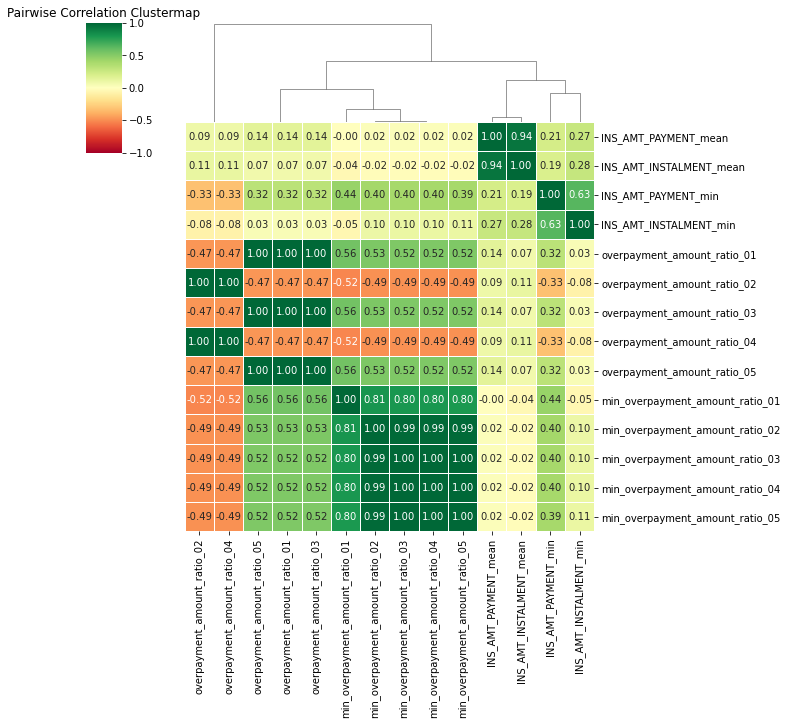

,mutual_info_with_target
INS_AMT_PAYMENT_mean,0.001380
INS_AMT_INSTALMENT_mean,0.001932
INS_AMT_PAYMENT_min,0.002206
INS_AMT_INSTALMENT_min,0.002411
overpayment_amount_ratio_01,0.002772
overpayment_amount_ratio_02,0.000000
overpayment_amount_ratio_03,0.000258
overpayment_amount_ratio_04,0.000000
overpayment_amount_ratio_05,0.000244
min_overpayment_amount_ratio_01,0.001138


In [40]:
tmp = cleaned_data.loc[:, ['INS_AMT_PAYMENT_mean', 'INS_AMT_INSTALMENT_mean',
                          'INS_AMT_PAYMENT_min', 'INS_AMT_INSTALMENT_min']]
tmp['overpayment_amount_ratio_01'] = (tmp['INS_AMT_PAYMENT_mean'] - tmp['INS_AMT_INSTALMENT_mean']) / (tmp['INS_AMT_INSTALMENT_mean'] + 0.01)
tmp['overpayment_amount_ratio_02'] = ((tmp['INS_AMT_PAYMENT_mean'] - tmp['INS_AMT_INSTALMENT_mean']) / (tmp['INS_AMT_INSTALMENT_mean'] + 0.01)) ** 2
tmp['overpayment_amount_ratio_03'] = ((tmp['INS_AMT_PAYMENT_mean'] - tmp['INS_AMT_INSTALMENT_mean']) / (tmp['INS_AMT_INSTALMENT_mean'] + 0.01)) ** 3
tmp['overpayment_amount_ratio_04'] = ((tmp['INS_AMT_PAYMENT_mean'] - tmp['INS_AMT_INSTALMENT_mean']) / (tmp['INS_AMT_INSTALMENT_mean'] + 0.01)) ** 4
tmp['overpayment_amount_ratio_05'] = ((tmp['INS_AMT_PAYMENT_mean'] - tmp['INS_AMT_INSTALMENT_mean']) / (tmp['INS_AMT_INSTALMENT_mean'] + 0.01)) ** 5
tmp['min_overpayment_amount_ratio_01'] = (tmp['INS_AMT_PAYMENT_min'] - tmp['INS_AMT_INSTALMENT_min']) / (tmp['INS_AMT_INSTALMENT_min'] + 0.01)
tmp['min_overpayment_amount_ratio_02'] = (tmp['INS_AMT_PAYMENT_min'] - tmp['INS_AMT_INSTALMENT_min']) / (tmp['INS_AMT_INSTALMENT_min'] + 0.01) ** 2
tmp['min_overpayment_amount_ratio_03'] = (tmp['INS_AMT_PAYMENT_min'] - tmp['INS_AMT_INSTALMENT_min']) / (tmp['INS_AMT_INSTALMENT_min'] + 0.01) ** 3
tmp['min_overpayment_amount_ratio_04'] = (tmp['INS_AMT_PAYMENT_min'] - tmp['INS_AMT_INSTALMENT_min']) / (tmp['INS_AMT_INSTALMENT_min'] + 0.01) ** 4
tmp['min_overpayment_amount_ratio_05'] = (tmp['INS_AMT_PAYMENT_min'] - tmp['INS_AMT_INSTALMENT_min']) / (tmp['INS_AMT_INSTALMENT_min'] + 0.01) ** 5

mutual_info(tmp, figsize = (9,9), clustermap = True)

In [100]:
# Final features added
tmp['overpayment_amount_ratio_01'] = (tmp['INS_AMT_PAYMENT_mean'] - tmp['INS_AMT_INSTALMENT_mean']) / (tmp['INS_AMT_INSTALMENT_mean'] + 0.01)
tmp['min_overpayment_amount_ratio_01'] = (tmp['INS_AMT_PAYMENT_min'] - tmp['INS_AMT_INSTALMENT_min']) / (tmp['INS_AMT_INSTALMENT_min'] + 0.01)

## Interaction with Income Level

/Users/fuwenkai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


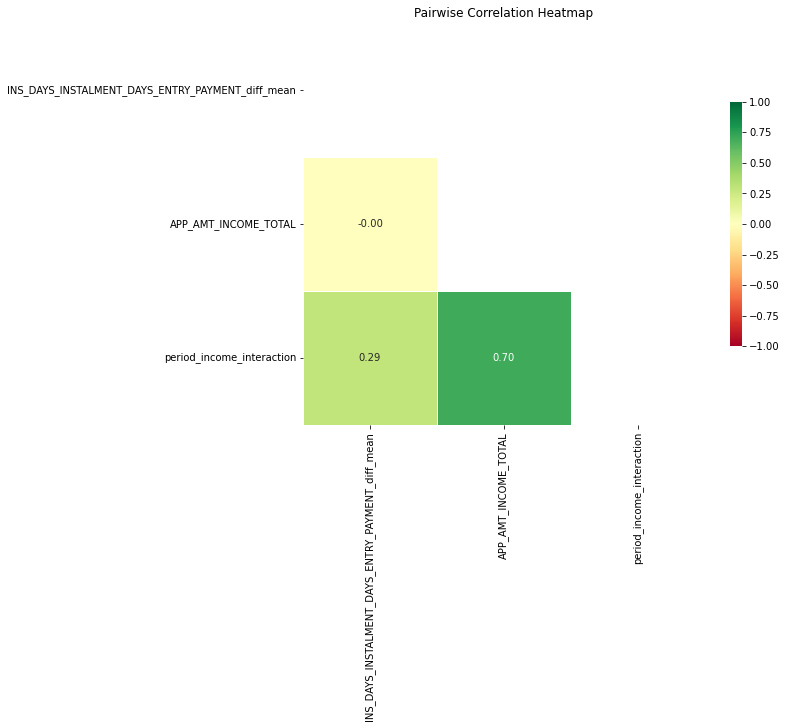

,mutual_info_with_target
INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_mean,0.001685
APP_AMT_INCOME_TOTAL,0.001831
period_income_interaction,0.000186


In [59]:
tmp = cleaned_data.loc[:,['INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_mean', 'APP_AMT_INCOME_TOTAL']]
tmp
tmp['period_income_interaction'] = tmp['INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_mean'] * tmp['APP_AMT_INCOME_TOTAL']

mutual_info(tmp, figsize = (9,9))

## Interaction with Credit Amount of Loan

/Users/fuwenkai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


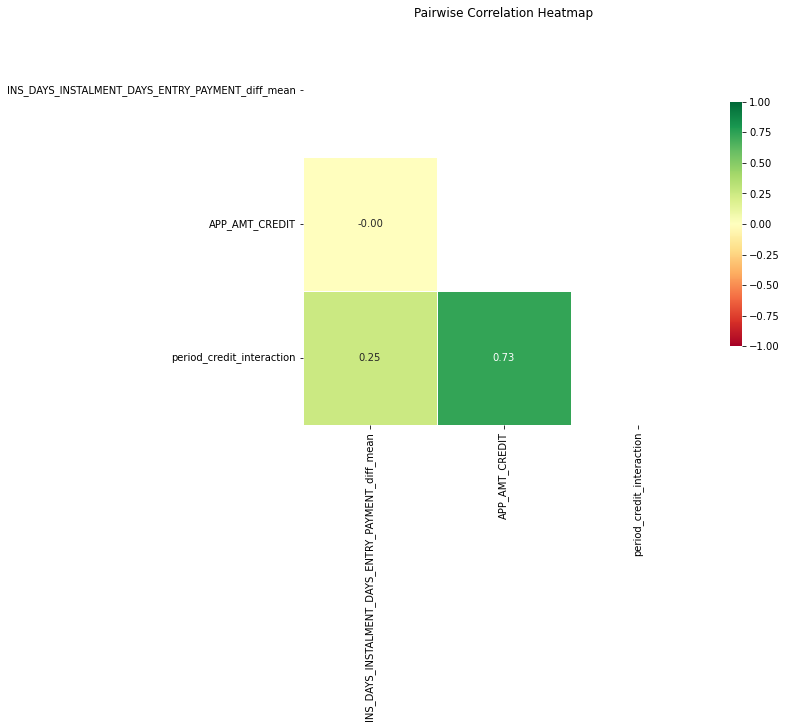

,mutual_info_with_target
INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_mean,0.001685
APP_AMT_CREDIT,0.000515
period_credit_interaction,0.000000


In [74]:
tmp = cleaned_data.loc[:,['INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_mean', 'APP_AMT_CREDIT']]
tmp['period_credit_interaction'] = tmp['INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_mean'] * tmp['APP_AMT_CREDIT']

mutual_info(tmp, figsize = (9,9))

##  Normalised measure for discrepancy ratio relative to the size of the loan

/Users/fuwenkai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


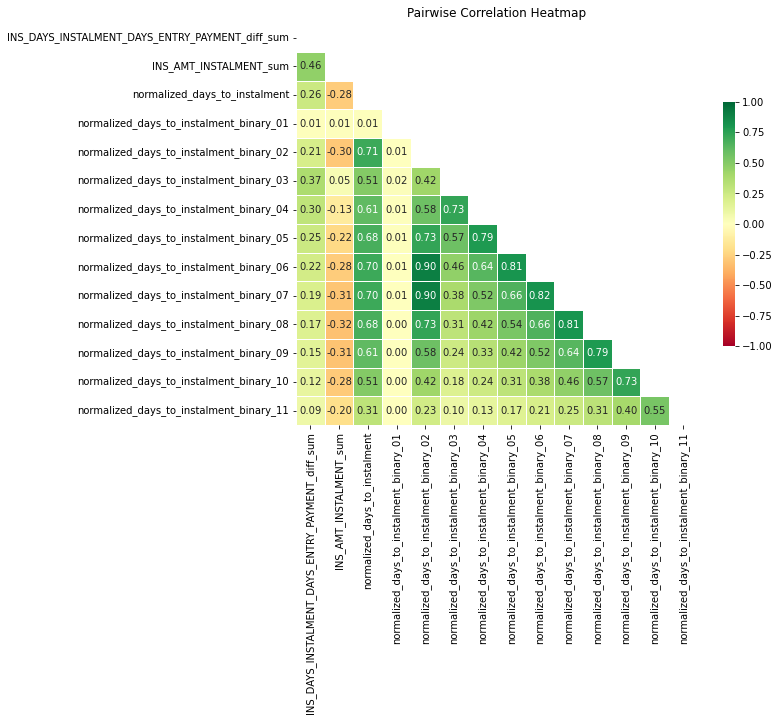

,mutual_info_with_target
INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_sum,0.001696
INS_AMT_INSTALMENT_sum,0.002151
normalized_days_to_instalment,0.001027
normalized_days_to_instalment_binary_01,0.066041
normalized_days_to_instalment_binary_02,0.016947
normalized_days_to_instalment_binary_03,0.047076
normalized_days_to_instalment_binary_04,0.035444
normalized_days_to_instalment_binary_05,0.026807
normalized_days_to_instalment_binary_06,0.018923
normalized_days_to_instalment_binary_07,0.013803


In [52]:
tmp = cleaned_data.loc[:,['INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_sum', 'INS_AMT_INSTALMENT_sum']]
tmp['normalized_days_to_instalment'] = tmp['INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_sum'] / (tmp['INS_AMT_INSTALMENT_sum'] + 0.1)
# tmp['normalized_days_to_instalment_mean'] = tmp['INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_sum'] / (tmp['INS_AMT_INSTALMENT_mean'] + 0.1)


# Convert ratio to binary
mean = tmp['normalized_days_to_instalment'].mean()
median = tmp['normalized_days_to_instalment'].median()
pct15 = tmp['normalized_days_to_instalment'].quantile(0.15)
pct25 = tmp['normalized_days_to_instalment'].quantile(0.25)
pct35 = tmp['normalized_days_to_instalment'].quantile(0.35)
pct45 = tmp['normalized_days_to_instalment'].quantile(0.45)
pct55 = tmp['normalized_days_to_instalment'].quantile(0.55)
pct65 = tmp['normalized_days_to_instalment'].quantile(0.65)
pct75 = tmp['normalized_days_to_instalment'].quantile(0.75)
pct85 = tmp['normalized_days_to_instalment'].quantile(0.85)
pct95 = tmp['normalized_days_to_instalment'].quantile(0.95)

tmp['normalized_days_to_instalment_binary_01'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > mean else 0) # Mean
tmp['normalized_days_to_instalment_binary_02'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > median else 0) # Median
tmp['normalized_days_to_instalment_binary_03'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct15 else 0) # 15 pct
tmp['normalized_days_to_instalment_binary_04'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct25 else 0) # 25 pct
tmp['normalized_days_to_instalment_binary_05'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct35 else 0) # 35 pct
tmp['normalized_days_to_instalment_binary_06'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct45 else 0) # 45 pct
tmp['normalized_days_to_instalment_binary_07'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct55 else 0) # 55 pct
tmp['normalized_days_to_instalment_binary_08'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct65 else 0) # 65 pct
tmp['normalized_days_to_instalment_binary_09'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct75 else 0) # 75 pct
tmp['normalized_days_to_instalment_binary_10'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct85 else 0) # 85 pct
tmp['normalized_days_to_instalment_binary_11'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct95 else 0) # 95 pct

mutual_info(tmp, figsize = (9,9))

In [98]:
## Final Features added
tmp['normalized_days_to_instalment_binary_01'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > mean else 0) # Mean
tmp['normalized_days_to_instalment_binary_03'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct25 else 0) # 25 pct
tmp['normalized_days_to_instalment_binary_04'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct75 else 0) # 75 pct

## Relative payment amount to the income level

/Users/fuwenkai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


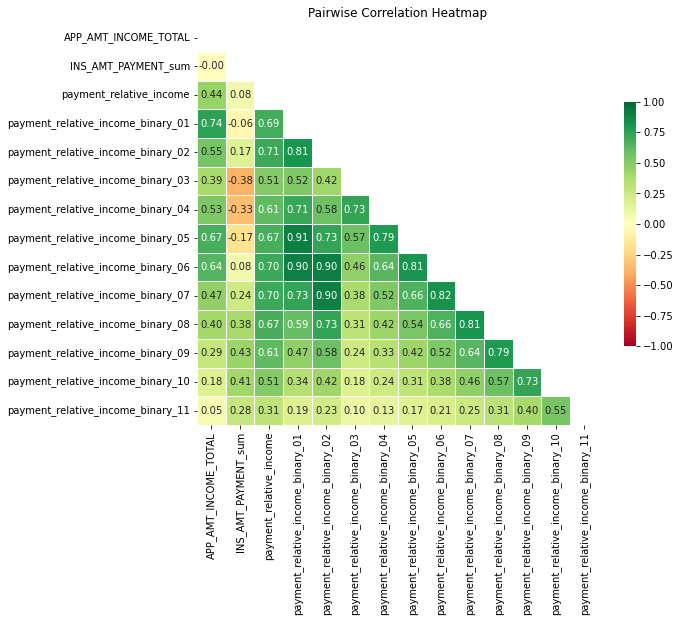

,mutual_info_with_target
APP_AMT_INCOME_TOTAL,0.001902
INS_AMT_PAYMENT_sum,0.000846
payment_relative_income,0.001642
payment_relative_income_binary_01,0.023405
payment_relative_income_binary_02,0.017233
payment_relative_income_binary_03,0.046816
payment_relative_income_binary_04,0.036114
payment_relative_income_binary_05,0.027411
payment_relative_income_binary_06,0.019206
payment_relative_income_binary_07,0.013382


In [51]:
tmp = cleaned_data.loc[:,['APP_AMT_INCOME_TOTAL', 'INS_AMT_PAYMENT_sum']]

# tmp['payment_relative_income'] = (np.log(tmp['INS_AMT_PAYMENT_sum'] + 0.01) / (np.log(tmp['APP_AMT_INCOME_TOTAL'] + 0.01)))
tmp['payment_relative_income'] = (np.log(tmp['INS_AMT_PAYMENT_sum'] + 0.01)) / (np.log(tmp['APP_AMT_INCOME_TOTAL'] + 0.01))

mean = tmp['payment_relative_income'].mean()
median = tmp['payment_relative_income'].median()
pct15 = tmp['payment_relative_income'].quantile(0.15)
pct25 = tmp['payment_relative_income'].quantile(0.25)
pct35 = tmp['payment_relative_income'].quantile(0.35)
pct45 = tmp['payment_relative_income'].quantile(0.45)
pct55 = tmp['payment_relative_income'].quantile(0.55)
pct65 = tmp['payment_relative_income'].quantile(0.65)
pct75 = tmp['payment_relative_income'].quantile(0.75)
pct85 = tmp['payment_relative_income'].quantile(0.85)
pct95 = tmp['payment_relative_income'].quantile(0.95)

tmp['payment_relative_income_binary_01'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > mean else 0) # Mean
tmp['payment_relative_income_binary_02'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > median else 0) # Median
tmp['payment_relative_income_binary_03'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct15 else 0) # 15 pct
tmp['payment_relative_income_binary_04'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct25 else 0) # 25 pct
tmp['payment_relative_income_binary_05'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct35 else 0) # 35 pct
tmp['payment_relative_income_binary_06'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct45 else 0) # 45 pct
tmp['payment_relative_income_binary_07'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct55 else 0) # 55 pct
tmp['payment_relative_income_binary_08'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct65 else 0) # 65 pct
tmp['payment_relative_income_binary_09'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct75 else 0) # 75 pct
tmp['payment_relative_income_binary_10'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct85 else 0) # 85 pct
tmp['payment_relative_income_binary_11'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct95 else 0) # 95 pct

mutual_info(tmp, figsize = (9,9))

In [28]:
# Final features added
tmp['payment_relative_income'] = (np.log(tmp['INS_AMT_PAYMENT_sum'] + 0.01)) / (np.log(tmp['APP_AMT_INCOME_TOTAL'] + 0.01))
tmp['payment_relative_income_binary_03'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct25 else 0) # 25 pct
tmp['payment_relative_income_binary_04'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct75 else 0) # 75 pct

## Payment Completion Ratio

/Users/fuwenkai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/Users/fuwenkai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4814: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))


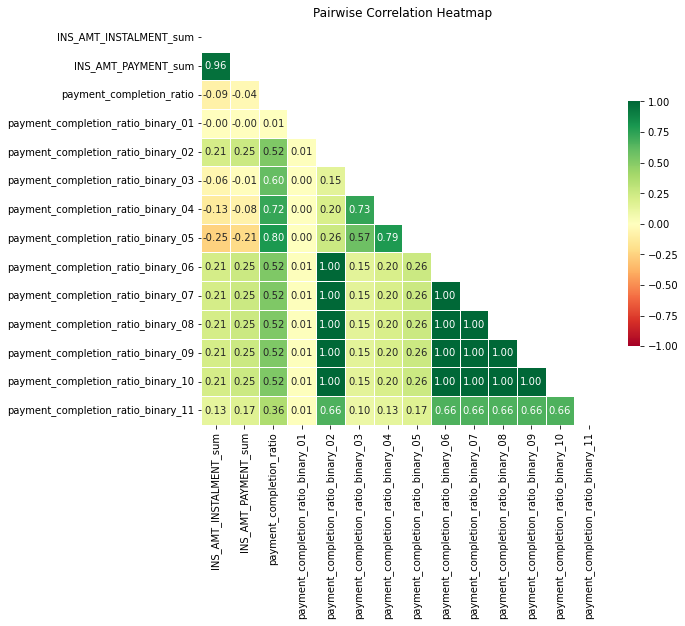

,mutual_info_with_target
INS_AMT_INSTALMENT_sum,0.002159
INS_AMT_PAYMENT_sum,0.000846
payment_completion_ratio,0.001646
payment_completion_ratio_binary_01,0.000401
payment_completion_ratio_binary_02,0.001360
payment_completion_ratio_binary_03,0.048575
payment_completion_ratio_binary_04,0.038752
payment_completion_ratio_binary_05,0.028964
payment_completion_ratio_binary_06,0.001563
payment_completion_ratio_binary_07,0.001066


In [50]:
tmp = cleaned_data.loc[:,['INS_AMT_INSTALMENT_sum', 'INS_AMT_PAYMENT_sum']]

tmp['payment_completion_ratio'] = (tmp['INS_AMT_PAYMENT_sum'] + 0.01) / (tmp['INS_AMT_INSTALMENT_sum'] + 0.01)

mean = tmp['payment_completion_ratio'].mean()
median = tmp['payment_completion_ratio'].median()
pct15 = tmp['payment_completion_ratio'].quantile(0.15)
pct25 = tmp['payment_completion_ratio'].quantile(0.25)
pct35 = tmp['payment_completion_ratio'].quantile(0.35)
pct45 = tmp['payment_completion_ratio'].quantile(0.45)
pct55 = tmp['payment_completion_ratio'].quantile(0.55)
pct65 = tmp['payment_completion_ratio'].quantile(0.65)
pct75 = tmp['payment_completion_ratio'].quantile(0.75)
pct85 = tmp['payment_completion_ratio'].quantile(0.85)
pct95 = tmp['payment_completion_ratio'].quantile(0.95)

tmp['payment_completion_ratio_binary_01'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > mean else 0) # Mean
tmp['payment_completion_ratio_binary_02'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > median else 0) # Median
tmp['payment_completion_ratio_binary_03'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > pct15 else 0) # 15 pct
tmp['payment_completion_ratio_binary_04'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > pct25 else 0) # 25 pct
tmp['payment_completion_ratio_binary_05'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > pct35 else 0) # 35 pct
tmp['payment_completion_ratio_binary_06'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > pct45 else 0) # 45 pct
tmp['payment_completion_ratio_binary_07'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > pct55 else 0) # 55 pct
tmp['payment_completion_ratio_binary_08'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > pct65 else 0) # 65 pct
tmp['payment_completion_ratio_binary_09'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > pct75 else 0) # 75 pct
tmp['payment_completion_ratio_binary_10'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > pct85 else 0) # 85 pct
tmp['payment_completion_ratio_binary_11'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > pct95 else 0) # 95 pct

mutual_info(tmp, figsize = (9,9))

In [36]:
# Final Features Added
tmp['payment_completion_ratio_binary_03'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > pct25 else 0) # 25 pct

## Annuity as a percentage of income

/Users/fuwenkai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/Users/fuwenkai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4814: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))


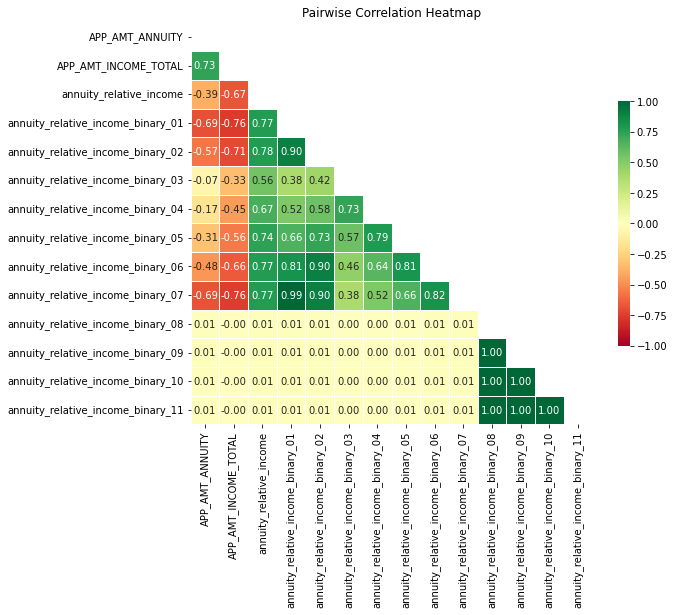

,mutual_info_with_target
APP_AMT_ANNUITY,0.000000
APP_AMT_INCOME_TOTAL,0.001507
annuity_relative_income,0.010362
annuity_relative_income_binary_01,0.013256
annuity_relative_income_binary_02,0.016635
annuity_relative_income_binary_03,0.046471
annuity_relative_income_binary_04,0.035834
annuity_relative_income_binary_05,0.027133
annuity_relative_income_binary_06,0.018889
annuity_relative_income_binary_07,0.013284


In [47]:
tmp = cleaned_data.loc[:,['APP_AMT_ANNUITY', 'APP_AMT_INCOME_TOTAL']]

tmp['annuity_relative_income'] = np.log(tmp['APP_AMT_ANNUITY'] + 0.01) / np.log(tmp['APP_AMT_INCOME_TOTAL'] + 0.01)
mean = tmp['annuity_relative_income'].mean()
median = tmp['annuity_relative_income'].median()
pct15 = tmp['annuity_relative_income'].quantile(0.15)
pct25 = tmp['annuity_relative_income'].quantile(0.25)
pct35 = tmp['annuity_relative_income'].quantile(0.35)
pct45 = tmp['annuity_relative_income'].quantile(0.45)
pct55 = tmp['annuity_relative_income'].quantile(0.55)
pct65 = tmp['annuity_relative_income'].quantile(0.65)
pct75 = tmp['annuity_relative_income'].quantile(0.75)
pct85 = tmp['annuity_relative_income'].quantile(0.85)
pct95 = tmp['annuity_relative_income'].quantile(0.95)

tmp['annuity_relative_income_binary_01'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > mean else 0) # Mean
tmp['annuity_relative_income_binary_02'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > median else 0) # Median
tmp['annuity_relative_income_binary_03'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > pct15 else 0) # 15 pct
tmp['annuity_relative_income_binary_04'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > pct25 else 0) # 25 pct
tmp['annuity_relative_income_binary_05'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > pct35 else 0) # 35 pct
tmp['annuity_relative_income_binary_06'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > pct45 else 0) # 45 pct
tmp['annuity_relative_income_binary_07'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > pct55 else 0) # 55 pct
tmp['annuity_relative_income_binary_08'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > pct65 else 0) # 65 pct
tmp['annuity_relative_income_binary_09'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > pct75 else 0) # 75 pct
tmp['annuity_relative_income_binary_10'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > pct85 else 0) # 85 pct
tmp['annuity_relative_income_binary_11'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > pct95 else 0) # 95 pct

mutual_info(tmp, figsize = (9,9))

In [45]:
# Final Features added
tmp['annuity_relative_income_binary_03'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > pct15 else 0) # 25 pct

## Interaction population region to period and descrepancy ratio

/Users/fuwenkai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


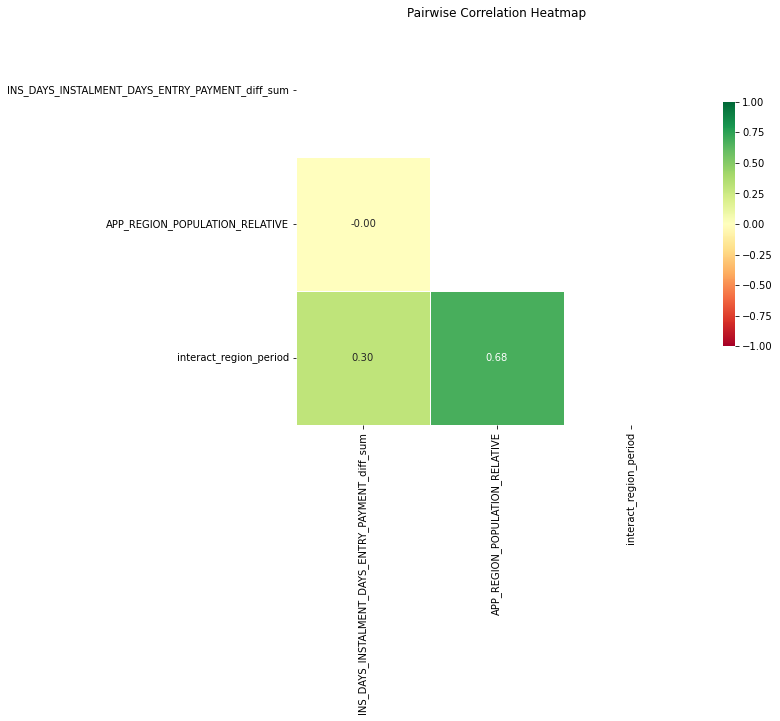

,mutual_info_with_target
INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_sum,0.001479
APP_REGION_POPULATION_RELATIVE,0.000000
interact_region_period,0.000000


In [49]:
tmp = cleaned_data.loc[:,['INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_sum', 'APP_REGION_POPULATION_RELATIVE']]

tmp['interact_region_period'] = tmp['INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_sum'] * tmp['APP_REGION_POPULATION_RELATIVE']

mutual_info(tmp, figsize = (9,9))

## After test, final features that pass the test are:

In [ ]:
# 1. Final features added for Overpayment period ratio
tmp['overpayment_period_ratio_02'] = (tmp['INS_DAYS_ENTRY_PAYMENT_mean'] - tmp['INS_DAYS_INSTALMENT_mean']) / (tmp['INS_DAYS_INSTALMENT_mean'] + 0.01) ** 2
tmp['max_overpayment_ratio_02'] = (tmp['INS_DAYS_ENTRY_PAYMENT_max'] - tmp['INS_DAYS_INSTALMENT_max']) / (tmp['INS_DAYS_INSTALMENT_max'] + 0.01) ** 2

# 2. Final features added for Overpayment amount ratio
tmp['overpayment_amount_ratio_01'] = (tmp['INS_AMT_PAYMENT_mean'] - tmp['INS_AMT_INSTALMENT_mean']) / (tmp['INS_AMT_INSTALMENT_mean'] + 0.01)
tmp['min_overpayment_amount_ratio_01'] = (tmp['INS_AMT_PAYMENT_min'] - tmp['INS_AMT_INSTALMENT_min']) / (tmp['INS_AMT_INSTALMENT_min'] + 0.01)

# 3. Final Features added for Discrepency to the size of the loan
tmp['normalized_days_to_instalment'] = tmp['INS_DAYS_INSTALMENT_DAYS_ENTRY_PAYMENT_diff_sum'
                                          ] / (tmp['INS_AMT_INSTALMENT_sum'] + 0.1) #Intermediate variable; not included
tmp['normalized_days_to_instalment_binary_01'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > mean else 0) # Mean
tmp['normalized_days_to_instalment_binary_03'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct25 else 0) # 25 pct
tmp['normalized_days_to_instalment_binary_04'] = tmp['normalized_days_to_instalment'].apply(lambda x: 1 if x > pct75 else 0) # 75 pct

# 4. Final features added for Relative payment amount to the total income level 
tmp['payment_relative_income'] = (np.log(tmp['INS_AMT_PAYMENT_sum'] + 0.01)) / (np.log(tmp['APP_AMT_INCOME_TOTAL'] + 0.01))
tmp['payment_relative_income_binary_03'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct25 else 0) # 25 pct
tmp['payment_relative_income_binary_04'] = tmp['payment_relative_income'].apply(lambda x: 1 if x > pct75 else 0) # 75 pct

# 5. Final Features Added for payment completion ratio
tmp['payment_completion_ratio'] = (tmp['INS_AMT_PAYMENT_sum'
                                      ] + 0.01) / (tmp['INS_AMT_INSTALMENT_sum'] + 0.01) #Intermediate variable; not included
tmp['payment_completion_ratio_binary_03'] = tmp['payment_completion_ratio'].apply(lambda x: 1 if x > pct25 else 0) # 25 pct

# 6. Final Features added for annuity as a percentage of income
tmp['annuity_relative_income'] = np.log(tmp['APP_AMT_ANNUITY'
                                           ] + 0.01) / np.log(tmp['APP_AMT_INCOME_TOTAL'] + 0.01) #Intermediate variable; not included
tmp['annuity_relative_income_binary_03'] = tmp['annuity_relative_income'].apply(lambda x: 1 if x > pct15 else 0) # 25 pct